In [1]:
%uv pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Using Python 3.13.9 environment at: C:\Users\vaibh\AppData\Local\Programs\Python\Python313
Resolved 38 packages in 428ms
Prepared 23 packages in 22.89s
Installed 28 packages in 2.28s
 + absl-py==2.3.1
 + astunparse==1.6.3
 + flatbuffers==25.9.23
 + gast==0.6.0
 + google-pasta==0.2.0
 + grpcio==1.76.0
 + h5py==3.15.1
 + keras==3.12.0
 + libclang==18.1.1
 + markdown==3.10
 + markdown-it-py==4.0.0
 + markupsafe==3.0.3
 + mdurl==0.1.2
 + ml-dtypes==0.5.3
 + namex==0.1.0
 + opt-einsum==3.4.0
 + optree==0.17.0
 + protobuf==6.33.0
 + pygments==2.19.2
 + rich==14.2.0
 + setuptools==80.9.0
 + tensorboard==2.20.0
 + tensorboard-data-server==0.7.2
 + tensorflow==2.20.0
 + termcolor==3.2.0
 + werkzeug==3.1.3
 + wheel==0.45.1
 + wrapt==2.0.0


In [2]:
import tensorflow as tf   

# Display the version
print(tf.__version__)     

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.20.0


In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
cifar10

<module 'keras.datasets.cifar10' from 'c:\\Users\\vaibh\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\keras\\datasets\\cifar10\\__init__.py'>

In [5]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

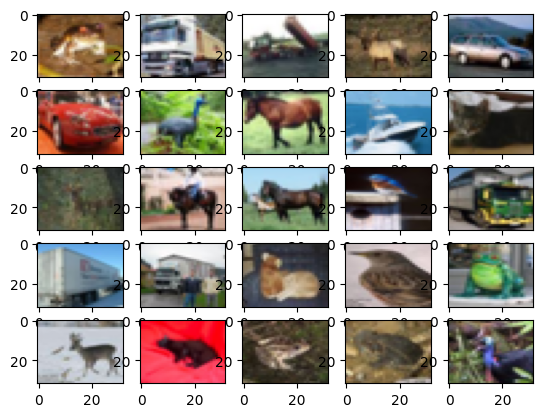

In [6]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

In [7]:
# number of classes
K = len(set(y_train))

# calculate total number of classes 
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [8]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
 849/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.4042 - loss: 1.9989

KeyboardInterrupt: 

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will continue training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 38s 23ms/step - loss: 0.5453 - accuracy: 0.8261 - val_loss: 0.4690 - val_accuracy: 0.8441
Epoch 2/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.4355 - accuracy: 0.8561 - val_loss: 0.4719 - val_accuracy: 0.8458
Epoch 3/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.4072 - accuracy: 0.8667 - val_loss: 0.4869 - val_accuracy: 0.8465
Epoch 4/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3791 - accuracy: 0.8731 - val_loss: 0.4678 - val_accuracy: 0.8485
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3651 - accuracy: 0.8787 - val_loss: 0.4647 - val_accuracy: 0.8446
Epoch 6/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3478 - accuracy: 0.8823 - val_loss: 0.4688 - val_accuracy: 0.8529
Epoch 7/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3371 - accuracy: 0.8871 - val_loss: 0.4546 -

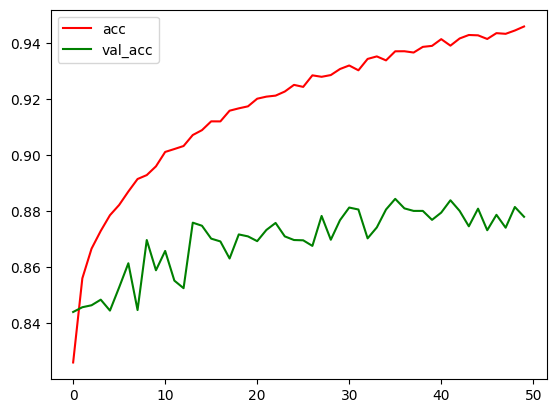

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 1s 847ms/step
Original label is cat and predicted label is cat


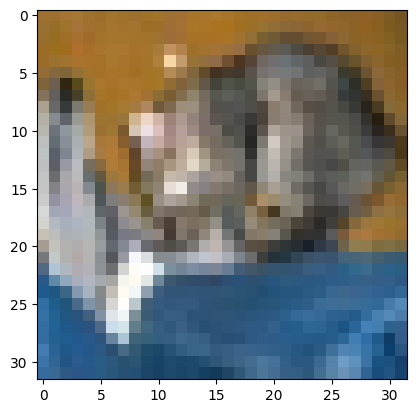

In [12]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and 
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [13]:
# save the model
model.save('image_classification.h5')

In [2]:
%uv pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


Using Python 3.13.9 environment at: C:\Users\vaibh\AppData\Local\Programs\Python\Python313
Resolved 2 packages in 211ms
Prepared 2 packages in 1.53s
Uninstalled 1 package in 259ms
Installed 2 packages in 160ms
 - numpy==2.3.4
 + numpy==2.2.6
 + opencv-python==4.12.0.88


In [3]:
import cv2, tensorflow as tf

print("OpenCV version:", cv2.__version__)        # Should print 4.5.5
print("TF version:", tf.__version__)             # Should print 2.10.0
print("GPUs detected:", tf.config.list_physical_devices('GPU'))


OpenCV version: 4.12.0
TF version: 2.20.0
GPUs detected: []


In [4]:
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)


In [7]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)
tf.constant([1.0]).gpu()
print("Success!")


IndexError: list index out of range

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"